In [1]:
import os 
import pandas as pd 
from tqdm import tqdm_notebook
from PIL import Image 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
data_dir = "../VOCtrainval_11-May-2012/VOCdevkit/VOC2012/JPEGImages/"

In [3]:
count = 0
height = []
width = []
for i in tqdm_notebook(os.listdir(data_dir)):
    try :
        img = Image.open(os.path.join(data_dir, i))
        height.append(img.height)
        width.append(img.width)
    except:
        pass

In [6]:
np.mean(width)

466.7975474452555

In [7]:
np.mean(height)

389.5076204379562

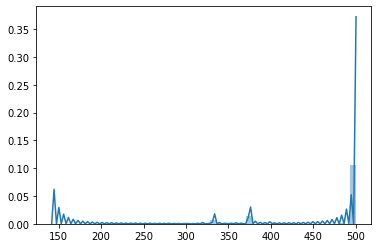

In [8]:
sns.distplot(width)

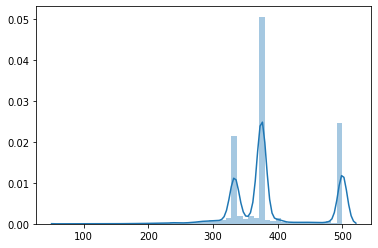

In [9]:
sns.distplot(height)

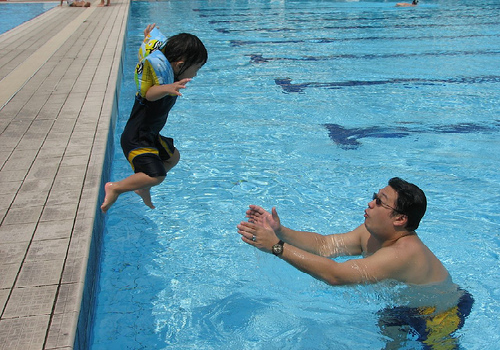

In [20]:
img.resize((500, 350))
# img

In [18]:
img.height

375

In [ ]:
# 450, 351

In [16]:
500/3

166.66666666666666

In [35]:
351/3

117.0

In [36]:
np.array(img).shape

(375, 500, 3)

In [30]:
df = pd.DataFrame(columns=["img_name", "1", "2", "3", "4", "5", "6", "7", "8", "9"]) 
save_dir_complete = "../voc_permuted/"

In [31]:
h = 381
w = 501
h_3 = h//3
w_3 = w//3
h_2 = int((2/3)*h)
w_2 = int((2/3)*w)

In [33]:
381/3

127.0

In [34]:
for i in tqdm_notebook((os.listdir(data_dir))):
    img_name = i
    img = Image.open(os.path.join(data_dir, i))
    img = img.resize((w, h))
    img  = np.array(img)

    if len(img.shape) == 3:
        rand_perm = np.random.permutation(9)
        img_dict = {
            1: img[0: h_3, 0: w_3, :], 
            2: img[0: h_3, w_3: w_2, :], 
            3: img[0: h_3 , w_2: w, :],
            4: img[h_3:h_2 , 0: w_3, :],
            5: img[h_3:h_2 , w_3: w_2, :], 
            6: img[h_3:h_2 , w_2: w, :], 
            7: img[h_2:h , 0: w_3, :], 
            8: img[h_2:h , w_3: w_2, :],
            9: img[h_2:h , w_2: w, :],
        }

        zeros = np.zeros(shape= (h, w, 3), dtype= np.uint8)
        k = 0

#         l = [0,0,0,1,1,1,2,2,2]
#         m= [0, 85, 170, 0, 85, 170, 0, 85, 170]
#         for g in rand_perm:
#             zeros[l[k]*85:85*(l[k] + 1), m[k]:85*(k%3 + 1), :] = img_dict[g + 1]
#             k = k+1

        l = [0,0,0,1,1,1,2,2,2]
        m= [0, w_3, w_2, 0, w_3, w_2,  0, w_3, w_2]
        for g in rand_perm:
            zeros[l[k]*h_3 : h_3*(l[k] + 1), m[k]: w_3*(k%3 + 1), :] = img_dict[g+1]
            k = k+1

        img_converted = Image.fromarray(zeros, "RGB")
        img_converted.save(os.path.join(save_dir_complete, img_name))
        df = df.append({"img_name": img_name,
                       "1": rand_perm[0],
                       "2": rand_perm[1], 
                       "3": rand_perm[2],
                       "4": rand_perm[3], 
                       "5": rand_perm[4], 
                       "6": rand_perm[5], 
                       "7": rand_perm[6], 
                       "8": rand_perm[7], 
                       "9": rand_perm[8]}, ignore_index=True)

In [35]:
df

,img_name,1,2,3,4,5,6,7,8,9
0,2007_000027.jpg,4,1,7,8,3,6,2,0,5
1,2007_000032.jpg,3,8,4,6,0,7,5,1,2
2,2007_000033.jpg,3,8,7,4,1,6,0,2,5
3,2007_000039.jpg,8,2,6,0,5,4,1,3,7
4,2007_000042.jpg,2,3,5,7,8,1,4,6,0
...,...,...,...,...,...,...,...,...,...,...
17120,2012_004326.jpg,6,3,0,7,8,2,5,1,4
17121,2012_004328.jpg,2,8,1,3,5,6,0,4,7
17122,2012_004329.jpg,1,3,7,5,4,0,8,6,2
17123,2012_004330.jpg,5,1,7,0,4,3,2,8,6


In [73]:
len(os.listdir(data_dir))

31784

In [77]:
len(set((df["img_name"])))

31783

In [78]:
df.drop_duplicates(subset="img_name", keep= False, inplace=True)

In [53]:
l = [0,0,0,1,1,1,2,2,2]
m= [0, w_3, w_2, 0, w_3, w_2,  0, w_3, w_2]
k = 0
for i in range(9):
    print(l[k]*h_3, h_3*(l[k] + 1), m[k], w_3*(k%3 + 1) )
    k = k+1

0 117 0 150
0 117 150 300
0 117 300 450
117 234 0 150
117 234 150 300
117 234 300 450
234 351 0 150
234 351 150 300
234 351 300 450


In [52]:
234-117

117

In [79]:
df.shape

(31782, 10)

In [36]:
df.to_csv("voc_permuted.csv")